# Lecture 10: Classification2 Part 2
1. Logistic function
2. Logistic Regression

### 1. Logistic function

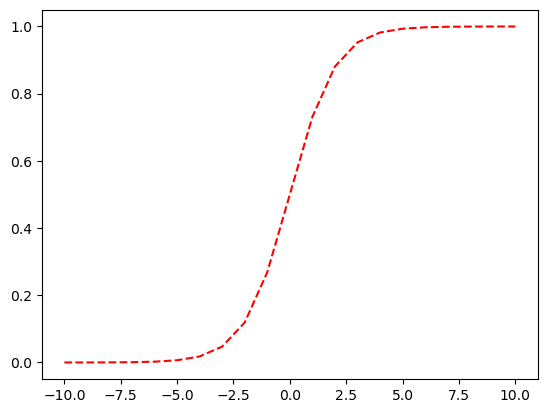

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def logistic(z):
    return np.exp(z)/(1+np.exp(z))

t = np.arange(-10, 11)

plt.plot(t, logistic(t), 'r--')
plt.show()


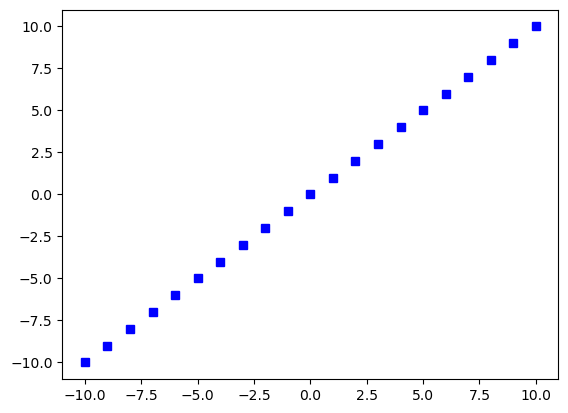

In [7]:
def logit(p):
    return np.log(p/(1-p))

t = np.arange(-10, 11)

plt.plot(t, logit(logistic(t)), 'bs') #should return t and it should be a straight line (linear)
plt.show()

### 2. Logistic Regression Example 1:
Pima Indians Diabetes Database. You can download the data at https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [10]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)

pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


Split dataset in features and target variable

In [13]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

Split X and y into training and testing sets

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

Training and Prediction

In [21]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16,max_iter=1000)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(y_pred)
#threshold has been applied so anything above 0.5 will be 1 and anything below 0.5 will be 0

[0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0
 1 1 0 1 0 1 0]


Model Evaluation using Confusion Matrix

In [24]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,   8],
       [ 29,  40]], dtype=int64)

Visualizing Confusion Matrix using Heatmap

Text(0.5, 427.9555555555555, 'Predicted label')

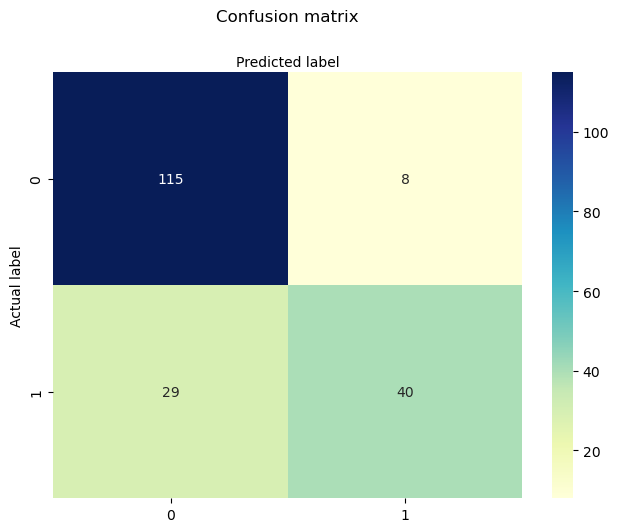

In [27]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [31]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names)) #prints out report with size of data samples

                  precision    recall  f1-score   support

without diabetes       0.80      0.93      0.86       123
   with diabetes       0.83      0.58      0.68        69

        accuracy                           0.81       192
       macro avg       0.82      0.76      0.77       192
    weighted avg       0.81      0.81      0.80       192



ROC Curve and AUC

[0.48848561 0.84000369 0.2926525  0.18113498 0.7805861  0.04470733
 0.77793087 0.90142259 0.02838289 0.02995746 0.05996877 0.36919011
 0.52387389 0.47183331 0.73189709 0.77389427 0.1609853  0.37670209
 0.11716045 0.16241555 0.26561382 0.77644922 0.63964484 0.08535183
 0.32334407 0.29354869 0.16138084 0.27667239 0.14526267 0.18821966
 0.23610307 0.26075819 0.28596838 0.30321221 0.50905736 0.71042102
 0.12457622 0.70338747 0.15548898 0.67847032 0.31398021 0.03320294
 0.32995187 0.39637943 0.05147354 0.04019182 0.72579322 0.26838633
 0.26504806 0.17592507 0.25808375 0.16075648 0.17034825 0.04423743
 0.17692923 0.07728236 0.87462223 0.12143547 0.55839438 0.07922347
 0.12901352 0.37692837 0.20004689 0.71544967 0.09730357 0.36650788
 0.42025453 0.06405315 0.24769717 0.38664733 0.72824004 0.04973912
 0.40708429 0.63384433 0.12130541 0.22572098 0.11221354 0.36434489
 0.10907941 0.65762469 0.68478883 0.77845247 0.11730447 0.05321521
 0.31276228 0.53507068 0.7003768  0.44778953 0.45637514 0.4608

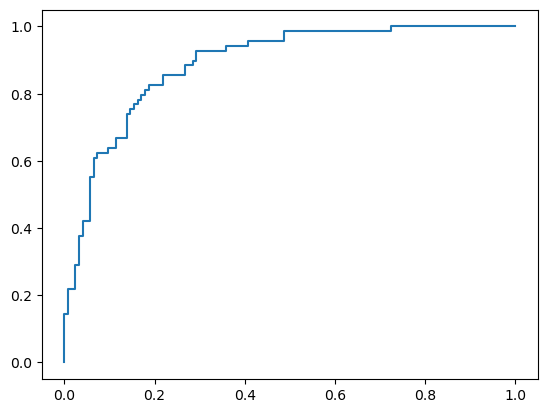

In [42]:
y_pred_proba = logreg.predict_proba(X_test)[:,1]   #Probability estimates
print(y_pred_proba) #threshold values/probabilities
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr)
plt.show()

#using the threshold values because they are all values between 0 and 1 even though above it only printed 1's and 0's but they have actual values between this range and it is plotted here

In [44]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(auc)

0.8891245434193473


### Logistic Regression Example 2: 
Breast Cancer Wisconsin (Original) Data Set. You can download the data at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)

In [51]:
bc = pd.read_csv('breast-cancer-wisconsin.csv')
bc = bc.dropna()  #drops instances with missing information.
print(bc)

          id  clump_thickness  size_uniformity  shape_uniformity  \
0    1000025                5                1                 1   
1    1002945                5                4                 4   
2    1015425                3                1                 1   
3    1016277                6                8                 8   
4    1017023                4                1                 1   
..       ...              ...              ...               ...   
694   776715                3                1                 1   
695   841769                2                1                 1   
696   888820                5               10                10   
697   897471                4                8                 6   
698   897471                4                8                 8   

     marginal_adhesion  epithelial_size  bare_nucleoli  bland_chromatin  \
0                    1                2            1.0                3   
1                    5           

In [78]:
bc['class'] = bc['class'].astype('category')
bc['class'].describe()
#444 out of 683 have type 2 cancer, the rest have type 4

count     683
unique      2
top         2
freq      444
Name: class, dtype: int64

We separate the labels from the rest of the dataset by dropping the appropriate column.

In [83]:
X = bc.drop(['class'], axis=1) #drops the independent variable
X = X.values
Y_raw = bc['class'].values

It would make our task easier to use '0' and '1' as the labels for our classes instead of the labels used by in the original dataset. This can easily be done with LabelEncoder

In [88]:
#encode categorical data with numerical data
# 2's and 4's (are not numerical in this case, they are categorical) and they are encoded to 0's and 1's
from sklearn import preprocessing
label_enc = preprocessing.LabelEncoder()
label_enc.fit(Y_raw)
Y = label_enc.transform(Y_raw)

print(Y_raw)
print(Y)

[2, 2, 2, 2, 2, ..., 2, 2, 4, 4, 4]
Length: 683
Categories (2, int64): [2, 4]
[0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1
 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1
 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0
 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0
 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0
 0 0 0 0 0 0 1 1 1 0 0

we can invert the label encoding with _label_enc.inverse_transform()_ later

In [108]:
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.3, random_state=1)

We are going to use regularisation in our model and we can choose between L1 and L2 penalties. The hyperparameter in this case is implemented as C and it corresponds to the inverse of the regularisation strength. This means that the smaller the value of C, the stronger the penalty.

In [111]:
from sklearn.model_selection import GridSearchCV
import sklearn.model_selection as ms

pen_val = ['l1','l2'] #penality variables
C_val = 2. ** np.arange(-5, 10, step=2)
#using the l1 (lasso regression) and l2 (ridge regression) penalty terms , determine what the best coefficient , C is
grid_s = [{'C': C_val, 'penalty': pen_val}] # C is the reciprocal of lambda for the regularization term
model = LogisticRegression(max_iter=1000)
model = LogisticRegression(max_iter=1000,solver='liblinear')

cv_logr = GridSearchCV(estimator=model, param_grid=grid_s, cv=ms.KFold(n_splits=10))

cv_logr.fit(XTrain, YTrain)
best_c = cv_logr.best_params_['C']
best_penalty = cv_logr.best_params_['penalty']

print("The best parameters are: cost={0} and penalty={1}".format(best_c, best_penalty))

The best parameters are: cost=0.5 and penalty=l1


Read https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Run again with the best setting

In [114]:
b_clf = LogisticRegression(C=best_c,penalty=best_penalty,solver='liblinear')
b_clf.fit(XTrain, YTrain)

predict = b_clf.predict(XTest)
y_proba = b_clf.predict_proba(XTest)

The accuracy of the model can be seen with the score method

In [117]:
print(b_clf.score(XTest, YTest))

0.9609756097560975


0.8891245434193473


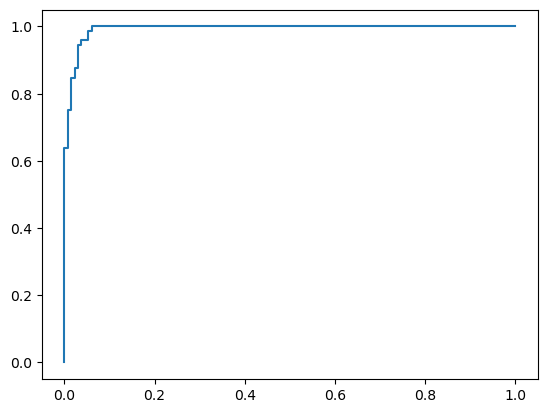

In [119]:
fpr, tpr, threshold=metrics.roc_curve(YTest, y_proba[:,1])
plt.plot(fpr, tpr)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(auc)